# Unsupervised Learning –Clustering
    1) K-means,K-means++
    2) Hierarchical Method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def plot_scatter(X,  color='k', alpha=0.6):
    #if use color index , the index must be between 0 and 1    
    return plt.scatter(X[:, 0],
                       X[:, 1],
                       c=color,
                       alpha=alpha,
                       edgecolor='k')    


## Genearte sample data and visualiztion

In [81]:
n1=5
n2=5
# cluster 
x1 = np.random.normal(60,10, n1)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5,n1)
C1=np.array(list(zip(x1,y1)))
# cluster 
x2 = np.random.normal(20,10,n2)
y2 = np.random.normal(5,0.5,n2)
C2=np.array(list(zip(x2,y2)))

X_train = np.concatenate((C1,C2))

print(np.mean(C1,axis=0))
print(np.mean(C2,axis=0))

[60.10643062  4.90579617]
[20.24871706  5.58689358]


In [33]:
X_train 

array([[37.97133187,  4.67120567],
       [56.29754279,  5.33233657],
       [60.08217507,  4.69690053],
       [53.89834211,  5.2738524 ],
       [63.53272789,  5.71172179],
       [29.70020081,  4.29794856],
       [19.05939005,  5.10841416],
       [16.16187567,  5.23358246],
       [-0.35679568,  5.1908315 ],
       [24.43622989,  5.36563052]])

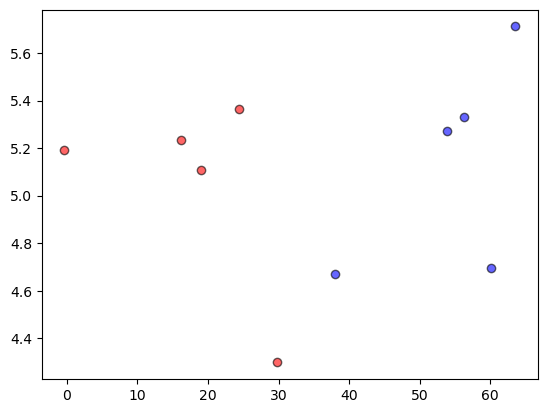

In [34]:
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.show()

In [35]:
X_train

array([[37.97133187,  4.67120567],
       [56.29754279,  5.33233657],
       [60.08217507,  4.69690053],
       [53.89834211,  5.2738524 ],
       [63.53272789,  5.71172179],
       [29.70020081,  4.29794856],
       [19.05939005,  5.10841416],
       [16.16187567,  5.23358246],
       [-0.35679568,  5.1908315 ],
       [24.43622989,  5.36563052]])

In [36]:
X_train.shape

(10, 2)

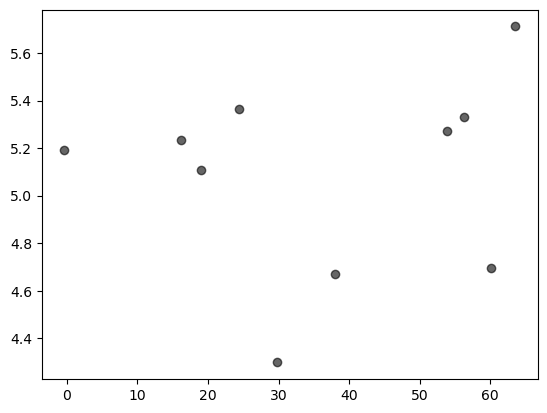

In [37]:
plot_scatter(X_train)
plt.show()

In [38]:
print('mean:',np.mean(X_train,axis=0))
print('std:',np.std(X_train,axis=0))

mean: [36.07830205  5.08824242]
std: [20.61535417  0.3928602 ]


# K-means algorithm
![](images/kmeans.png)
```    
    init : {‘k-means++’, ‘random’ or an ndarray} Method for initialization, defaults to ‘k-means++’:
    ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
    ‘random’: choose k observations (rows) at random from data for the initial centroids.
    If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
```    


In [39]:
kmeans = KMeans(init='random',n_clusters=2).fit(X_train)
kmeans

KMeans(init='random', n_clusters=2)

In [40]:
kmeans.predict([[80, 0], [100, 3]])

array([0, 0])

In [41]:
kmeans.predict([[28, 5]])

array([1])

In [42]:
kmeans.predict(X_train)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [43]:
kmeans.cluster_centers_

array([[54.35642395,  5.13720339],
       [17.80018015,  5.03928144]])

In [44]:
X_train

array([[37.97133187,  4.67120567],
       [56.29754279,  5.33233657],
       [60.08217507,  4.69690053],
       [53.89834211,  5.2738524 ],
       [63.53272789,  5.71172179],
       [29.70020081,  4.29794856],
       [19.05939005,  5.10841416],
       [16.16187567,  5.23358246],
       [-0.35679568,  5.1908315 ],
       [24.43622989,  5.36563052]])

In [45]:
kmeans.labels_

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

##    Plot Scatter
    1. 將資料點繪製成scatter圖. 請依據K-means分群後的結果來給予不同cluster有不同的顏色
       (cluster數非固定值)
    2. 將K-means中心點資料點也繪製上去並有較大圖樣

In [46]:
kmeans.predict(X_train)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

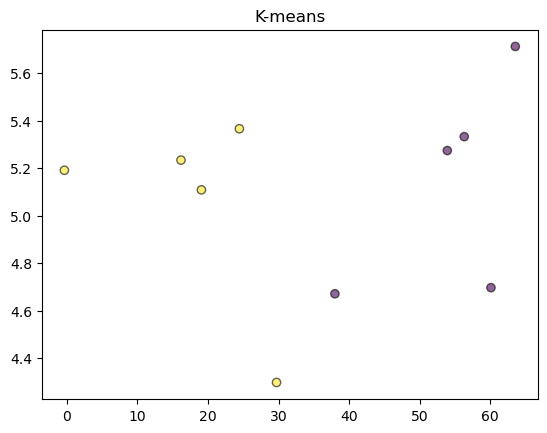

In [47]:
plot_scatter(X_train,kmeans.predict(X_train))
plt.title("K-means")
plt.show()

In [48]:
kmeans.cluster_centers_

array([[54.35642395,  5.13720339],
       [17.80018015,  5.03928144]])

In [49]:
kmeans.cluster_centers_[:,1]

array([5.13720339, 5.03928144])

In [50]:
kmeans.predict(X_train)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

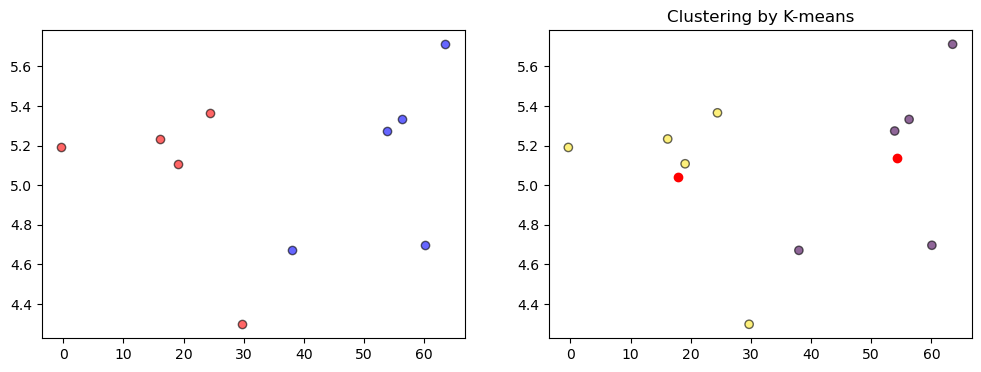

In [51]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_scatter(C1,color='b')
plot_scatter(C2,color='r')
plt.subplot(122)
plot_scatter(X_train,color=kmeans.predict(X_train))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red')
plt.title("Clustering by K-means")
plt.show()


## Agglomerative algorithm
    1) linkage : {“ward”, “complete”, “average”, “single”}, optional (default=”ward”)
    
    2.) affinity : string or callable, default: “euclidean”
    Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

In [60]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [64]:
acv = AgglomerativeClustering(n_clusters=2,linkage='ward').fit(X_train)
acv

AgglomerativeClustering()

In [65]:
cluster_labels=acv.fit_predict(X_train)
cluster_labels

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

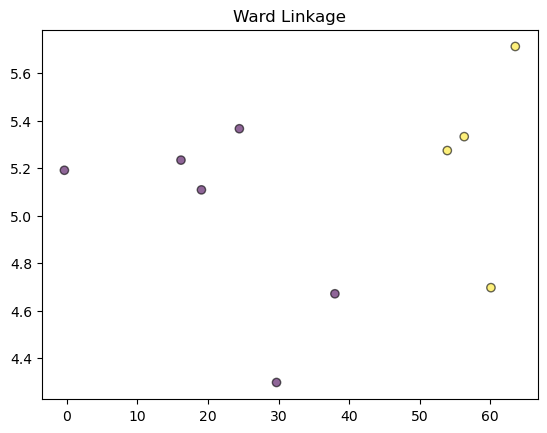

In [66]:
plot_scatter(X_train, acv.fit_predict(X_train))
plt.title("Ward Linkage")
plt.show()

In [67]:
X_train

array([[37.97133187,  4.67120567],
       [56.29754279,  5.33233657],
       [60.08217507,  4.69690053],
       [53.89834211,  5.2738524 ],
       [63.53272789,  5.71172179],
       [29.70020081,  4.29794856],
       [19.05939005,  5.10841416],
       [16.16187567,  5.23358246],
       [-0.35679568,  5.1908315 ],
       [24.43622989,  5.36563052]])

## distance matrix

In [58]:
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles,make_blobs
D = np.round(pairwise_distances(X_train),1) 
D

array([[ 0. , 18.3, 22.1, 15.9, 25.6,  8.3, 18.9, 21.8, 38.3, 13.6],
       [18.3,  0. ,  3.8,  2.4,  7.2, 26.6, 37.2, 40.1, 56.7, 31.9],
       [22.1,  3.8,  0. ,  6.2,  3.6, 30.4, 41. , 43.9, 60.4, 35.7],
       [15.9,  2.4,  6.2,  0. ,  9.6, 24.2, 34.8, 37.7, 54.3, 29.5],
       [25.6,  7.2,  3.6,  9.6,  0. , 33.9, 44.5, 47.4, 63.9, 39.1],
       [ 8.3, 26.6, 30.4, 24.2, 33.9,  0. , 10.7, 13.6, 30.1,  5.4],
       [18.9, 37.2, 41. , 34.8, 44.5, 10.7,  0. ,  2.9, 19.4,  5.4],
       [21.8, 40.1, 43.9, 37.7, 47.4, 13.6,  2.9,  0. , 16.5,  8.3],
       [38.3, 56.7, 60.4, 54.3, 63.9, 30.1, 19.4, 16.5,  0. , 24.8],
       [13.6, 31.9, 35.7, 29.5, 39.1,  5.4,  5.4,  8.3, 24.8,  0. ]])

In [70]:
D.shape[0]

10

In [72]:
def min_dist(D):
    minimum=10000  
    min_x=0
    min_y=0
    for i in range(D.shape[0]):
        for j in range(i):           
            if D[i][j]<minimum:         
                minimum=D[i][j]
                min_x=i
                min_y=j
                #print(i,j,D[i][j])
                
    return (min_x+1,min_y+1),minimum

In [73]:
min_dist(D)

((4, 2), 2.4)

## plot dendrogram (樹狀圖)

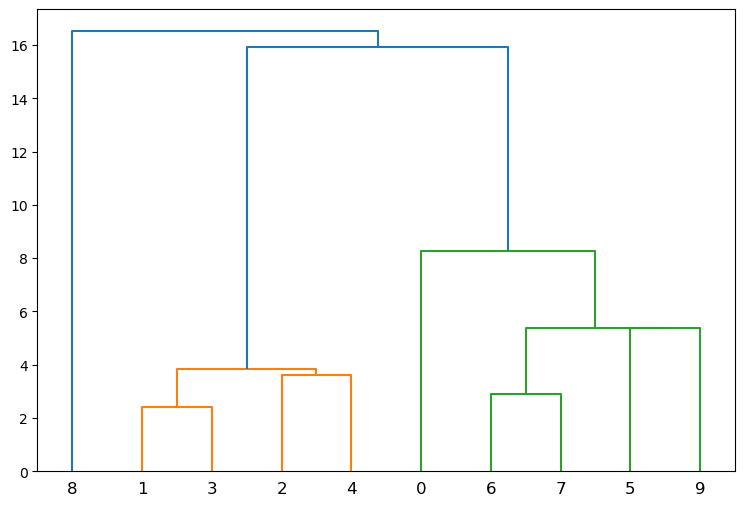

In [71]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))

def plot_dendrogram(x, method='ward'):
    Z = linkage(x, method)
    dendrogram(Z)

plot_dendrogram(X_train,'single')
plt.show()

## Comparing different hierarchical linkage methods

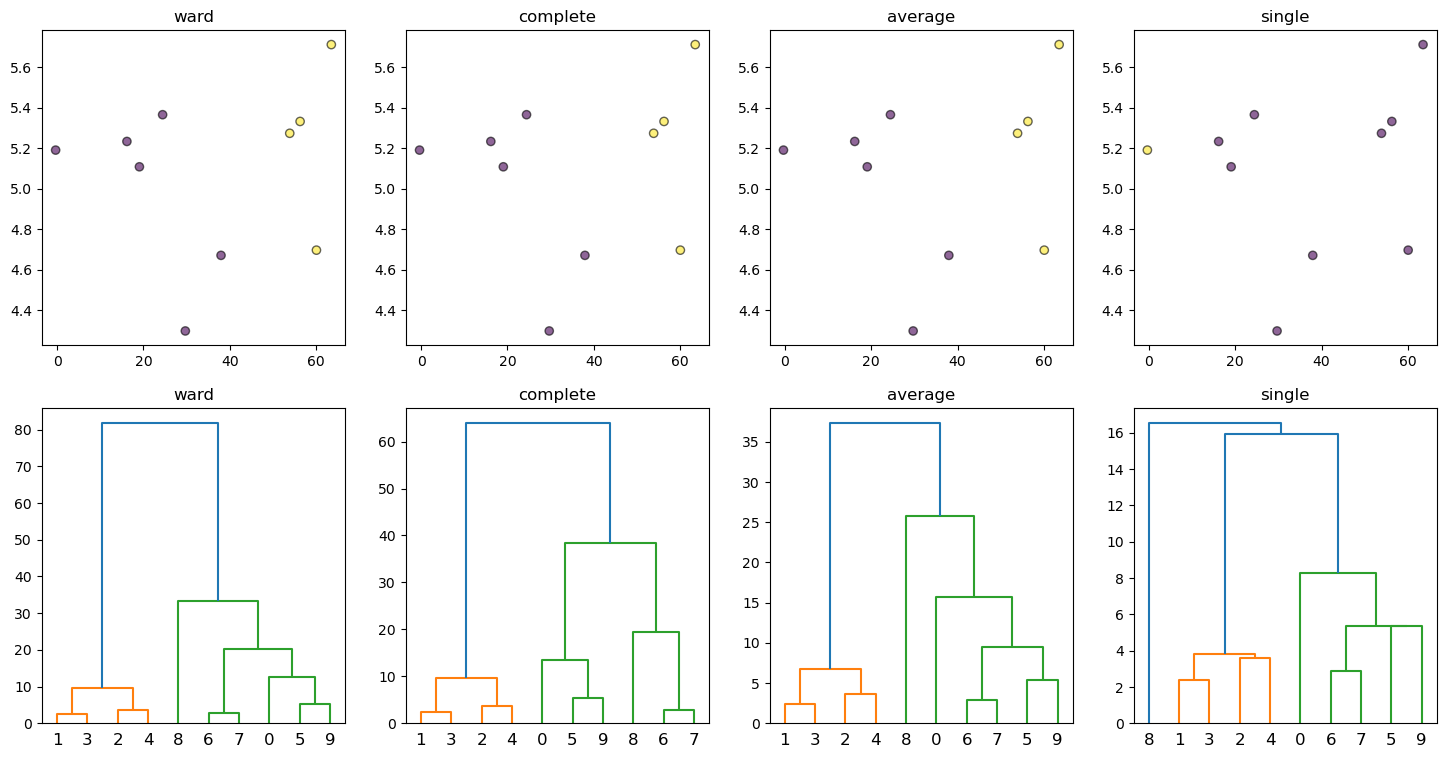

In [74]:

def compare_linkage(X):
    
    plt.figure(figsize=(18, 9))
    linktype=['ward', 'complete', 'average', 'single']

    for i,link in enumerate(linktype):
        model = AgglomerativeClustering(n_clusters=2,linkage=link).fit(X)
        cluster_labels=model.fit_predict(X)   
        #plot scatter 
        plt.subplot(2,4,i+1)        
        plot_scatter(X, cluster_labels)
        plt.title(link)
        # plot dendrogram
        plt.subplot(2,4,i+5)        
        plot_dendrogram(X,link)
        plt.title(link)   

    plt.show()     
    
compare_linkage(X_train)

## Apply K-means with re-scaled data
### Feature Re-scale 

In [82]:
X_train

array([[68.78093648,  4.4384165 ],
       [58.29574503,  4.707451  ],
       [59.36821611,  5.09098357],
       [52.51081814,  5.3909677 ],
       [61.57643733,  4.90116209],
       [29.59428543,  5.58045658],
       [18.03251033,  4.9865964 ],
       [33.04113159,  5.67566564],
       [10.9128215 ,  5.78168511],
       [ 9.66283647,  5.91006417]])

[40.17757384  5.24634487]
[21.36734675  0.46881634]


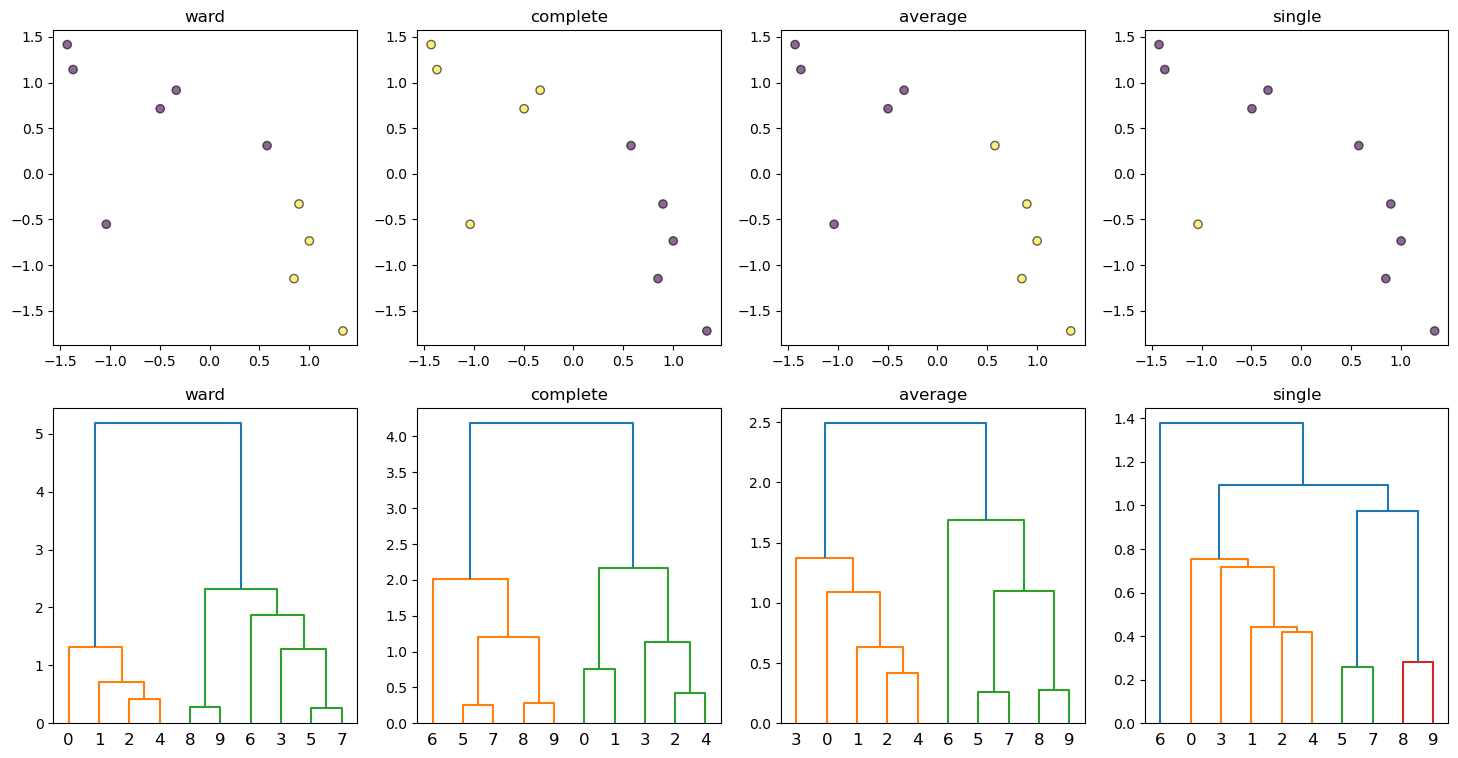

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

#transform: (x-u)/std.
X_train_std = sc.transform(X_train)

np.round(np.mean(X_train_std,axis=0),2)

compare_linkage(X_train_std)

In [77]:
from sklearn.datasets import make_circles
# make a synthetic dataset (circle) #array of shape [n_samples, 2]
X, y = make_circles(n_samples=100, shuffle=True,factor=0.5, random_state=0, noise=0.05) 

In [78]:
print(X[:10])
print(y[:10])

[[-0.97084503 -0.12673179]
 [-0.01989117 -0.45880462]
 [ 0.95036645  0.21475102]
 [ 0.3868271   0.25685525]
 [-0.53375109 -0.00663921]
 [ 0.34970205 -0.2956982 ]
 [-0.41722927  0.81854348]
 [-0.47625865  0.08139568]
 [ 0.42783229  0.26529816]
 [ 0.36259195 -0.27483444]]
[0 1 0 1 1 1 0 1 1 1]


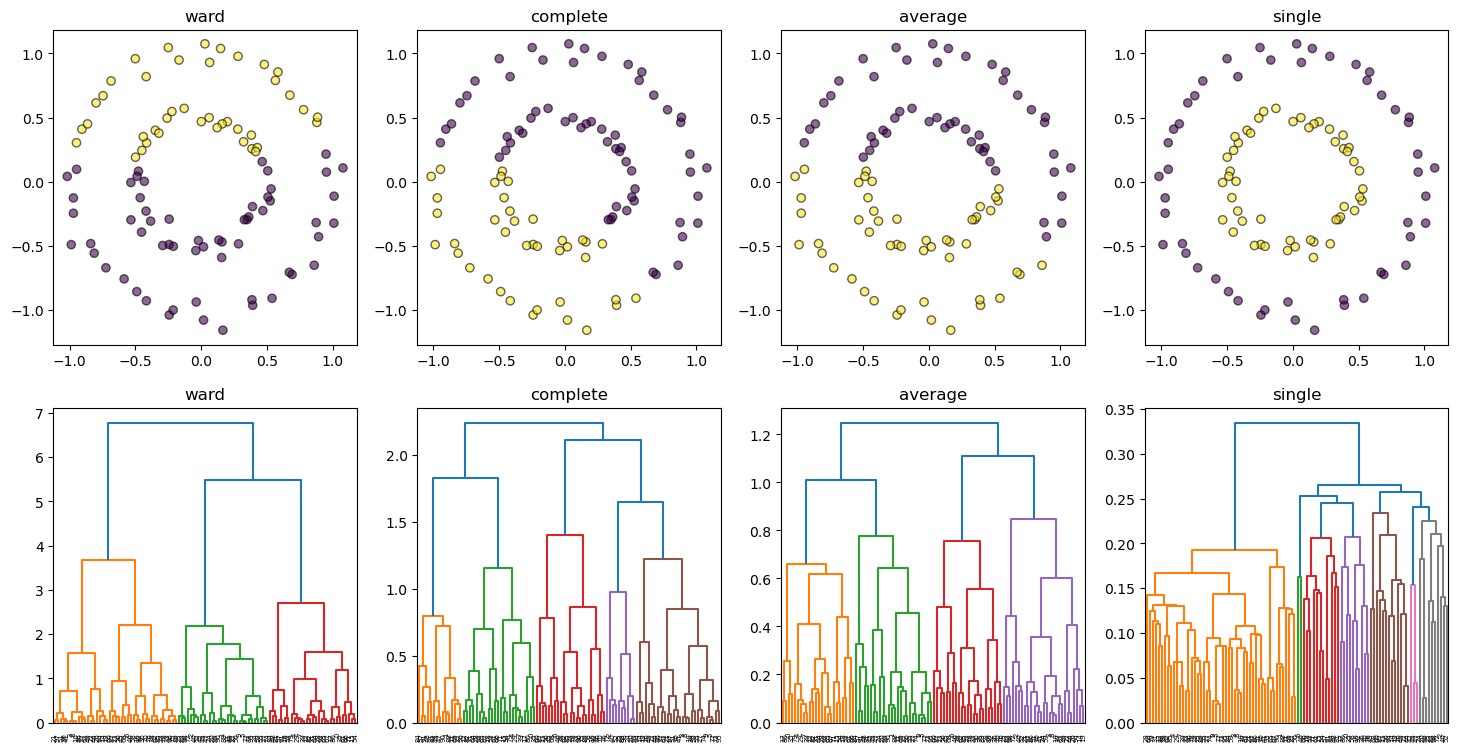

In [79]:
compare_linkage(X)